<p style="text-align:center; font-size:xx-large; color:black;">Linear Models in Python</p>

### <font color='black'>Table of contents<font><a class='anchor' id='top'></a>
- [A Mathematical Intro to Linear Models](#1)
- [Running Linear Regressions in Statsmodels](#2)
- [Diagnostic Plots (explain Linear Model Assumptions)](#3)
- [Model Metrics](#4)
- [Cross-Validation (CV) Techniques](#5)
- [Subset Selection Methods](#6)
- [Regularization Techniques](#7)
- [Example of Finding an Appropriate Linear Model for Diabetes Dataset](#8)

<p style="text-align:center; font-size:x-large; color:black;">A Mathematical Introduction to OLS Regression</p>

When performing a Linear Regression, our goal is to model the relationship between one or more independent variables (predictors) and a dependent variable (response) by fitting a linear equation to observed data. This line of best fit is calculated analytically, and is typically done through a method called Ordinary Least Squares (OLS for short). In this section, I will walk through the math used to calculate the line of best fit. <br>

Suppose we had n observations of data where there was one response variable Y along with p independent predictors x<sub>1</sub>, x<sub>2</sub>, ..., x<sub>p</sub>. Suppose that each of our Y observation could also be expressed as a linear combination of the observations of our p predictors.

$$
Y = \beta X + \epsilon $$

$$
\begin{bmatrix}
y_{1} & y_{2} & ... & y_{n} \\
\end{bmatrix} = 
\begin{bmatrix}
\beta_{0} & \beta_{1} & ... & \beta_{p} \\
\end{bmatrix} 
\begin{bmatrix}
1 & 1 & ... & 1 \\
x_{1,1} & x_{1,2} & ... & x_{1,n} \\
x_{2,1} & x_{2,2} & ... & x_{2,n} \\
\vdots & \vdots & \ddots & \vdots \\
x_{p,1} & x_{p,2} & ... & x_{p,n} \\
\end{bmatrix} + 
\begin{bmatrix}
\epsilon_{1} \\
\epsilon_{2} \\
\vdots \\
\epsilon_{n} \\
\end{bmatrix}, \text{\qquad}  \epsilon_{i} \sim N(0,\sigma^{2}) \\
$$

We can express each datapoint as the following
$$
Y_{i} = \beta_{0} + \beta_{1}x_{1,i} + \beta_{2}x_{2,i} + ... + \beta_{p}x_{p,i} + \epsilon \text{\qquad \qquad}  \epsilon_{i} \sim N(0,\sigma^{2}) \\
$$

$$
\min_{\beta} \sum_{i=1}^{n} (Y_{i} - \hat{Y_{i}})^{2} = \min_{\beta} (Y-\beta X)^2 \\
\frac{d}{d\beta} (Y-\beta X)^2 = 2(Y-\beta X) * -X^{T} = -2X^{T} (Y-\beta X) \\ 
-2X^{T} (Y-\beta X) = 0 \\
X^{T} (Y-\beta X) = 0 \\
X^{T}Y - X^{T}X\beta = 0 \\
X^{T}X\beta = X^{T}Y \\
\beta = (X^{T}X)^{-1}X^{T}Y \\ 
\frac{d^{2}}{d\beta d\beta^{T}} = 2 \parallel X \parallel ^{2} 
$$
What If X^Tx is not invertible? We can use gradient descent methods


<p style="text-align:center; font-size:x-large; color:black;">Running Linear Regerssions in Statsmodels and Scikit-Learn</p>

Before running any type of regression, we need some data. Scikit-Learn has some free-to-use data sets, and all be using the Diabetes Dataset. <br><br>
 __age__ - age in years <br>
__sex__ - male or female <br>
__bmi__ - body mass index <br>
__bp__- average blood pressure <br>
__s1__- TC: total serum cholesterol <br>
__s2__- LDL: low-density lipoproteins <br>
__s3__- HDL: high-density lipoproteins <br>
__s4__- TCH: total cholesterol / HDL <br>
__s5__- LTG: possibly log of serum triglycerides level <br>
__s6__- GLU: blood sugar level <br>
__target__: a quantitative measure of disease progression one year after baseline <br>
<br>
<br>
<br>
Normalization can help in reducing the scale differences between different features in your dataset. 
When features have very different scales, it can lead to numerical instability in algorithms like linear regression. 
Normalization ensures that each feature contributes proportionally to the result, preventing dominance by certain features solely due to their scale.

In [1]:
import warnings
warnings.filterwarnings("ignore")
from sklearn.datasets import load_diabetes
import pandas as pd

diabetes = load_diabetes(scaled = True)
df = pd.DataFrame(data = diabetes.data, columns = diabetes.feature_names)
df['target'] = diabetes.target
df

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6,target
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019907,-0.017646,151.0
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068332,-0.092204,75.0
2,0.085299,0.050680,0.044451,-0.005670,-0.045599,-0.034194,-0.032356,-0.002592,0.002861,-0.025930,141.0
3,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022688,-0.009362,206.0
4,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031988,-0.046641,135.0
...,...,...,...,...,...,...,...,...,...,...,...
437,0.041708,0.050680,0.019662,0.059744,-0.005697,-0.002566,-0.028674,-0.002592,0.031193,0.007207,178.0
438,-0.005515,0.050680,-0.015906,-0.067642,0.049341,0.079165,-0.028674,0.034309,-0.018114,0.044485,104.0
439,0.041708,0.050680,-0.015906,0.017293,-0.037344,-0.013840,-0.024993,-0.011080,-0.046883,0.015491,132.0
440,-0.045472,-0.044642,0.039062,0.001215,0.016318,0.015283,-0.028674,0.026560,0.044529,-0.025930,220.0


If we wanted to visualize this data real quick, we can use Seaborn to do a pariplot

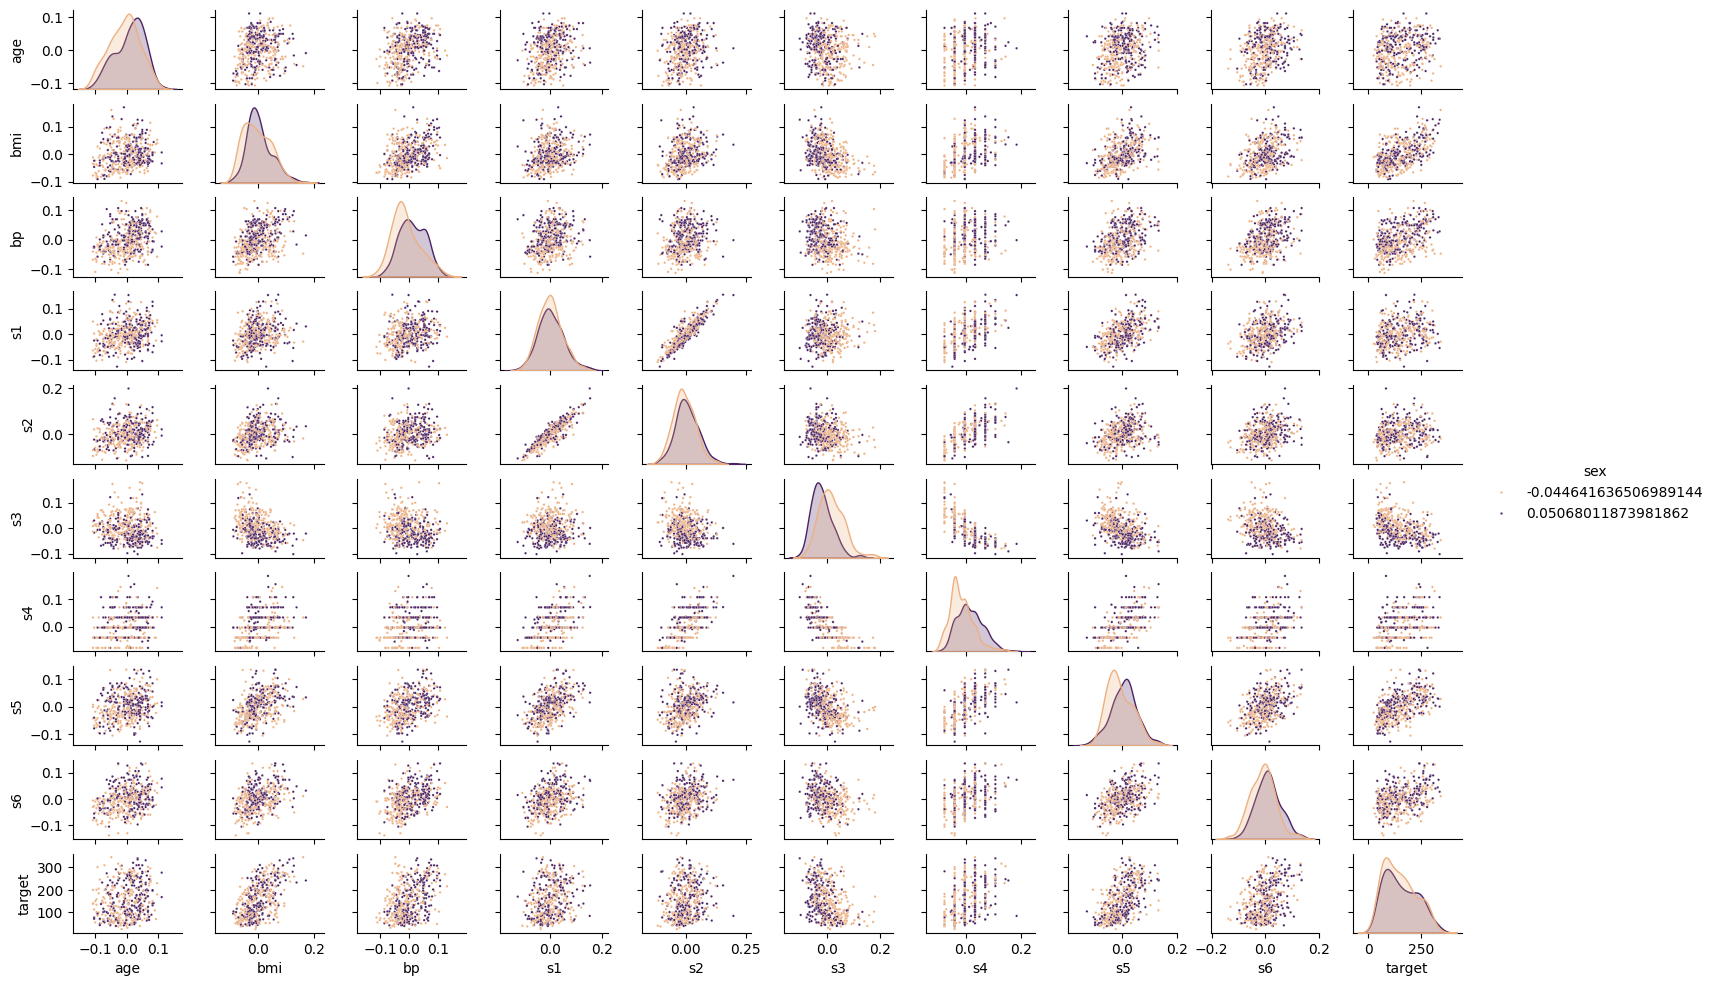

In [18]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.pairplot(df, hue = 'sex', height = 1, aspect = 1.5, plot_kws={'s': 3}, palette = 'flare')
plt.yticks(rotation=0)
plt.show()

# change legend

Now that we have our data, we can now run linear regressions.

<p style="text-align:left; font-size:large; color:black;">Statsmodels Implementation</p>

In [2]:
import statsmodels.api as sm

simple_model_sm = sm.OLS(df['target'], sm.add_constant(df['bmi'])).fit()
multiple_model_sm = sm.OLS(df['target'], sm.add_constant(df[['bmi', 's5']])).fit()

print(simple_model_sm.summary())
print(multiple_model_sm.summary())

                            OLS Regression Results                            
Dep. Variable:                 target   R-squared:                       0.344
Model:                            OLS   Adj. R-squared:                  0.342
Method:                 Least Squares   F-statistic:                     230.7
Date:                Mon, 25 Mar 2024   Prob (F-statistic):           3.47e-42
Time:                        03:31:31   Log-Likelihood:                -2454.0
No. Observations:                 442   AIC:                             4912.
Df Residuals:                     440   BIC:                             4920.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        152.1335      2.974     51.162      0.0

<p style="text-align:left; font-size:large; color:black;">Scikit-Learn Implementation</p>

In [66]:
from sklearn.linear_model import LinearRegression

simple_model_sk = LinearRegression()
simple_model_sk.fit(df['bmi'].to_frame(), df['target'])

print('Simple Regression:')
print(f'Intercept Term: {round(simple_model_sk.intercept_, 4)}')
print(f'Coefficient of BMI: {round(simple_model_sk.coef_[0], 4)}')

multiple_model_sk = LinearRegression()
multiple_model_sk.fit(df[['bmi', 's5']], df['target'])

print('\nMultiple Regression:')
print(f'Intercept Term: {round(multiple_model_sk.intercept_, 4)}')
print(f'Coefficient of BMI: {round(multiple_model_sk.coef_[0], 4)}')
print(f'Coefficient of s5: {round(multiple_model_sk.coef_[1], 4)}')

Simple Regression:
Intercept Term: 152.1335
Coefficient of BMI: 949.4353

Multiple Regression:
Intercept Term: 152.1335
Coefficient of BMI: 675.0714
Coefficient of s5: 614.9499


Explanation why You gonna use Statsmodels as much as possible. (Pros Cons Table)

<p style="text-align:left; font-size:large; color:black;">Understanding the Statsmodels Summary</p>

Middle: this tells us if we can reject our null hypothesis or not

In [9]:
# Middle
for i in range(11, 17):
    print(simple_model_summary_strings[i])

# Provide context of what the hypothesis test is
# target ~ bmi shows us that we can use a significance level of 0.001 to reject the null hyp
    # Explain that we can approximately model target via target = 152.1335 + 949.4353(bmi)
# Give example of something that wouldn't pass hyp test. Probably like age

                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        152.1335      2.974     51.162      0.000     146.289     157.978
bmi          949.4353     62.515     15.187      0.000     826.570    1072.301


Top: This tells of the goodness-of-fit of our linear model

In [13]:
# Top
for i in range(1, 12):
    print(simple_model_summary_strings[i][39:])

# R^2 / Adjusted R^2: You know it's for explained variance type shit, but know what adj does.
# F-statistic, same thing
# Log-Likelihood: You know what this is. Explain how it's prevalent method of fitting a Logistic Regression
# AIC/BIC
    
# Note down that all of these mainly serve as relative measures. You can compare it to the multi-reg and see which one has better values
# Basically, checking which model fomr a set of models has the 'best' fit.

 R-squared:                       0.344
 Adj. R-squared:                  0.342
 F-statistic:                     230.7
 Prob (F-statistic):           3.47e-42
 Log-Likelihood:                -2454.0
 AIC:                             4912.
 BIC:                             4920.
                                       
                                       


Bottom:
This section mainly tells us about the distribution of our residuals

In [16]:
# Bottom
for i in range(16, 22):
    print(simple_model_summary_strings[i])

# Omnibus: Understand this better (probably something to do with homosced of resids)
# Skew/Kurtosis: Normal dist has skew 0 and kurt 3
# Durbin-Watson: Measure of normality, but more useful for time-series analysis problems
# Jarque-Bera: test for normality
# Condition Number:

Omnibus:                       11.674   Durbin-Watson:                   1.848
Prob(Omnibus):                  0.003   Jarque-Bera (JB):                7.310
Skew:                           0.156   Prob(JB):                       0.0259
Kurtosis:                       2.453   Cond. No.                         21.0


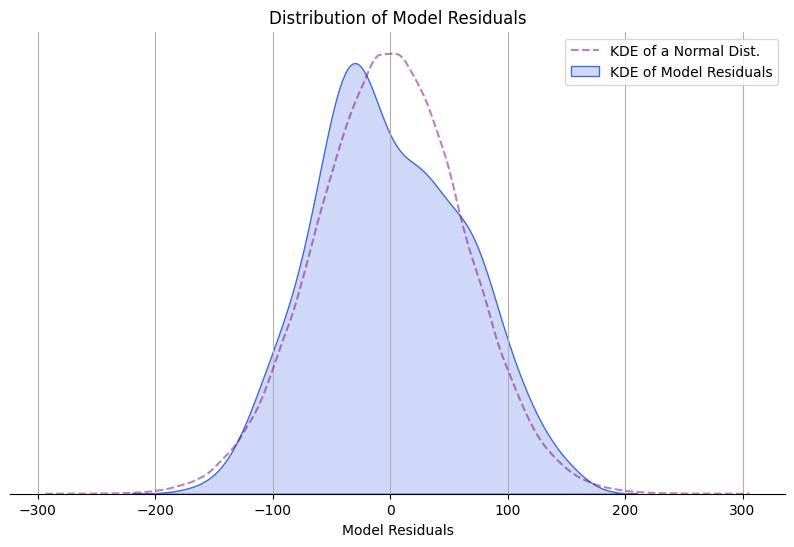

In [20]:
from statsmodels.graphics.regressionplots import *
import numpy as np

# Plotting residuals against a theoretical normal distribution:
plt.figure(figsize = (10,6))
sns.kdeplot(np.random.normal(loc = 0, scale = np.std(simple_model_sm.resid), size = 200000), label = 'KDE of a Normal Dist.', color = 'purple', alpha = 0.5, linestyle = '--')
sns.kdeplot(simple_model_sm.resid, label = 'KDE of Model Residuals', color = '#4169E1', fill = True)
plt.legend()
plt.gca().spines[['top', 'right', 'left']].set_visible(False)
plt.xlabel('Model Residuals')
plt.yticks([])
plt.ylabel("")
plt.grid(True)
plt.title('Distribution of Model Residuals')
plt.show()
# tie it back to Jarque-Bera and Omnibus, which provided evidence against normal dist in the model resid.

<p style="text-align:left; font-size:large; color:black;">Getting Predictions From Our Model</p>

In [24]:
import numpy as np
import pandas as pd

x_vals = pd.Series(np.linspace(np.min(df['bmi']), np.max(df['bmi']), 1000))
predictions = simple_model_sm.get_prediction(sm.add_constant(x_vals))
mean_values = predictions.predicted_mean
values_confidence_interval = predictions.conf_int()

model_predictions = pd.DataFrame({'Fitted X Values (BMI)': x_vals,              # X values that we want to predict Y with
                                 'Predicted Y Values (Target)': mean_values,    # Expected Value/Mean of Y given X
                                 '[0.025':values_confidence_interval[:, 0],     # Lower Bound of Confidence Interval
                                 '0.975]':values_confidence_interval[:, 1]})    # Upper Bound of Confidence Interval
model_predictions

# Explain that this same logic can be applied to the multiple linear regression
# Show that these can be used to make graphs

,Fitted X Values (BMI),Predicted Y Values (Target),[0.025,0.975]
0,-0.090275,66.422935,53.885808,78.960062
1,-0.090014,66.670825,54.162069,79.179580
2,-0.089753,66.918714,54.438313,79.399116
3,-0.089492,67.166604,54.714538,79.618670
4,-0.089231,67.414493,54.990745,79.838242
...,...,...,...,...
995,0.169511,313.073071,291.441658,334.704484
996,0.169772,313.320961,291.658660,334.983262
997,0.170033,313.568850,291.875658,335.262042
998,0.170294,313.816740,292.092653,335.540827


                              Simple Regression                                                                     Multiple Regression                              


                            OLS Regression Results                                |                                OLS Regression Results                            
==============================================================================    |    ==============================================================================
Dep. Variable:                 target   R-squared:                       0.344    |    Dep. Variable:                 target   R-squared:                       0.459
Model:                            OLS   Adj. R-squared:                  0.342    |    Model:                            OLS   Adj. R-squared:                  0.457
Method:                 Least Squares   F-statistic:                     230.7    |    Method:                 Least Squares   F-statistic:                     186.6
Da

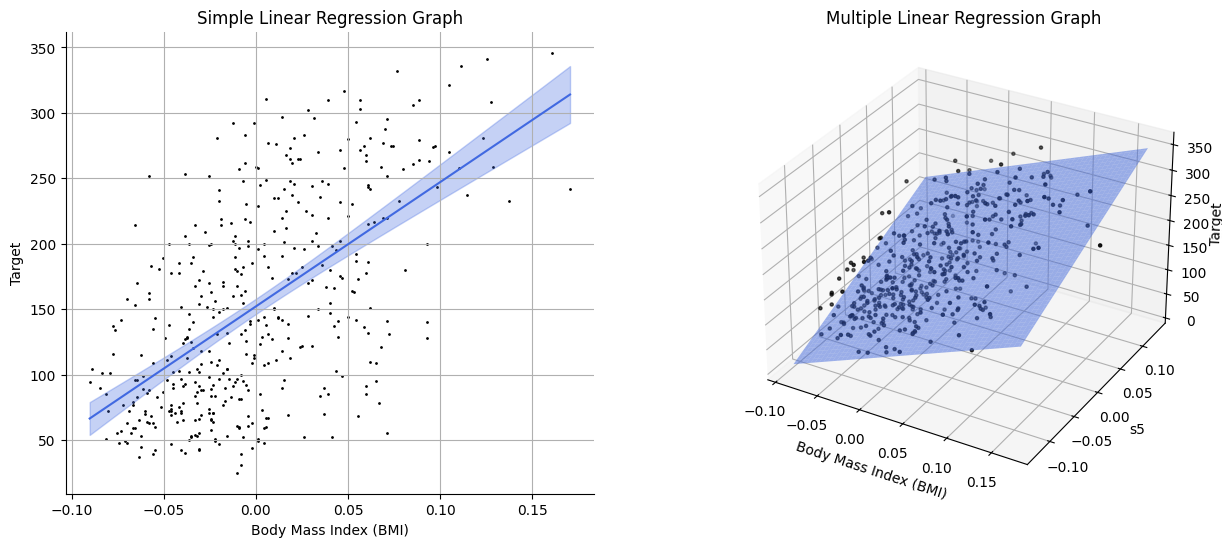

<Figure size 1200x1200 with 0 Axes>

In [25]:
print(simple_title + (' ' * 9) + multiple_title)
print('\n')
for i in range(len(multiple_model_summary_strings) - 3):
    if i < len(simple_model_summary_strings) - 3:
        print(simple_model_summary_strings[i] + (' ' * 4) + '|' + (' ' * 4) + multiple_model_summary_strings[i])
    else:
        print((' ' * 82) + '|' + (' ' * 4) + multiple_model_summary_strings[i])

fig = plt.figure(figsize = (15,6))
ax1 = plt.subplot(1, 2, 1)
ax1.scatter(df['bmi'], df['target'], s = 1, color = 'black')
ax1.plot(x_vals, mean_values, color = '#4169E1', linestyle = '-')
ax1.fill_between(x_vals, values_confidence_interval[:, 0], values_confidence_interval[:, 1], color = '#4169E1', alpha = 0.3, label = 'Confidence Interval')
ax1.grid(True)
ax1.spines[['top', 'right']].set_visible(False)
ax1.set_xlabel('Body Mass Index (BMI)')
ax1.set_ylabel('Target')
ax1.set_title('Simple Linear Regression Graph')

# Plotting a plane of best fit for our multiple linear regression by using predictions of given inputs 
prediction_inputs = pd.DataFrame()
prediction_inputs['bmi'] = np.linspace(np.min(df['bmi']), np.max(df['bmi']), 100)
prediction_inputs['s5'] = np.linspace(np.min(df['s5']), np.max(df['s5']), 100)

X, Y = np.meshgrid(prediction_inputs['bmi'], prediction_inputs['s5'])
meshgrid_coordinates = np.column_stack([X.flatten(), Y.flatten()])
Z = multiple_model_sm.predict(sm.add_constant(meshgrid_coordinates))
Z = Z.reshape(X.shape)

ax2 = plt.subplot(1, 2, 2, projection = '3d')
fig = plt.figure(figsize = (12,12))
ax2.scatter(df['bmi'], df['s5'], df['target'], color = 'black', s = 5)
ax2.plot_surface(X, Y, Z, color = '#4169E1', alpha = 0.5)
ax2.set_xlabel('Body Mass Index (BMI)')
ax2.set_ylabel('s5')
ax2.set_zlabel('Target', labelpad = 0)
ax2.set_title('Multiple Linear Regression Graph')

plt.show()

<p style="text-align:center; font-size:x-large; color:black;">Diagnostic Plots</p>

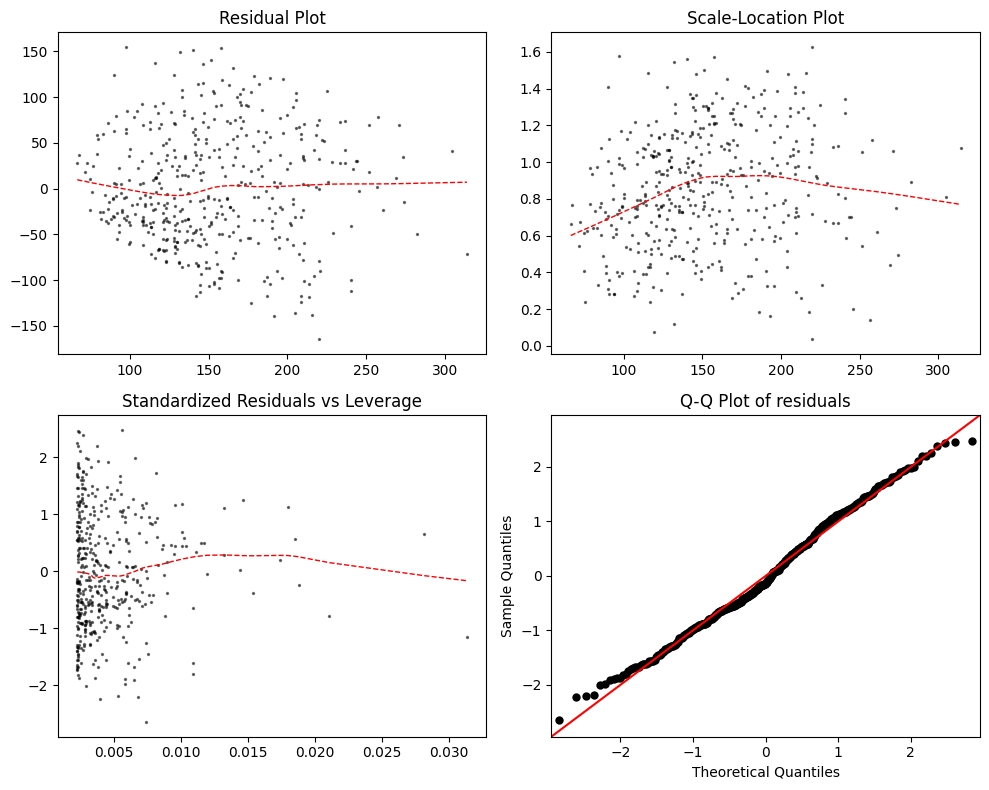

In [27]:
from scipy import stats


# Note that each Residual Analysis method has a visual & quantitative way about going around it.
    # E.g Normality of resids: KDE plot, QQ plot, and Jarque-Bera test
    # E.g Homosced: Residual Plot with Lowess, and Many tests. E.g Goldfeld-Quandt, Bruesch-Pagan, and White test
fig, axs = plt.subplots(2, 2, figsize=(10, 8))

# Residual Plot
sns.regplot(x = simple_model_sm.predict(sm.add_constant(df['bmi'])), y = simple_model_sm.resid, lowess = True,
            scatter_kws = {'color': 'black', 'alpha': 0.5, 's':2},
            line_kws={'color': 'red', 'lw': 1, 'linestyle':'--'}, ax= axs[0,0])
axs[0,0].set_title('Residual Plot')

# Scale-Location
mean_resid = np.mean(simple_model_sm.resid)
std_resid = np.std(simple_model_sm.resid)
standardized_residuals = [(x - mean_resid) / std_resid for x in simple_model_sm.resid]
sns.regplot(x = simple_model_sm.predict(sm.add_constant(df['bmi'])), y = np.sqrt(np.abs(standardized_residuals)), lowess = True,
            scatter_kws = {'color': 'black', 'alpha': 0.5, 's':2},
            line_kws={'color': 'red', 'lw': 1, 'linestyle':'--'}, ax = axs[0,1])
axs[0,1].set_title('Scale-Location Plot')

# Influence
influence = simple_model_sm.get_influence()
sns.regplot(x = influence.hat_matrix_diag, y = standardized_residuals, lowess=True,
            scatter_kws = {'color': 'black', 'alpha': 0.5, 's':2},
            line_kws={'color': 'red', 'lw': 1, 'linestyle':'--'}, ax = axs[1,0])
axs[1,0].set_title('Standardized Residuals vs Leverage')

# QQ-Plot
sm.qqplot(np.array(standardized_residuals), line = '45',  markerfacecolor = 'black', markeredgecolor  = 'None', ax = axs[1,1])
axs[1,1].set_title('Q-Q Plot of residuals')

plt.tight_layout()
plt.show()

<p style="text-align:center; font-size:x-large; color:black;">Cross-Validation (CV) Methods</p>

Point of CV: We want to test on unseen data. That is where those model metrics actually come into play. So far, we have fit our models the the entire data set. This doesn't give us much detail wen it comes to the predictive power of a Linear Model

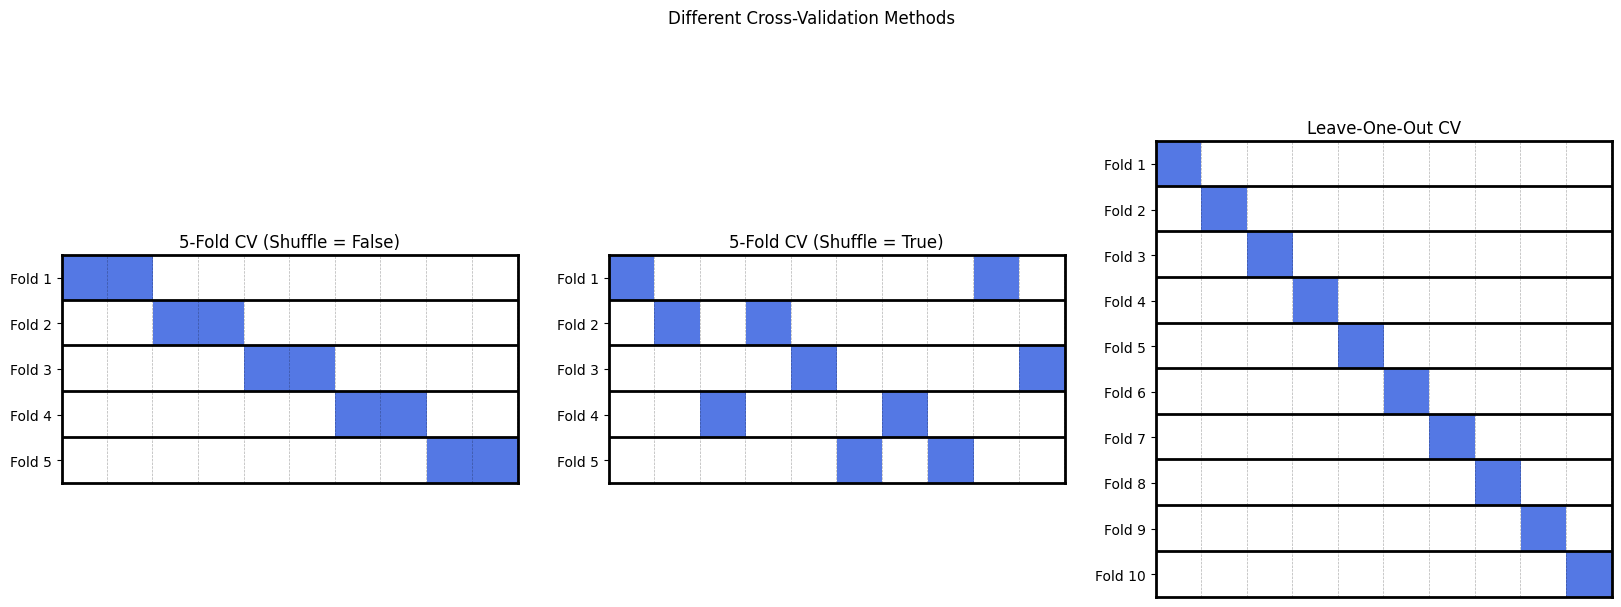

In [77]:
import matplotlib.cm as cm
from matplotlib.colors import LinearSegmentedColormap

grid1 = [[1,1,0,0,0,0,0,0,0,0],
        [0,0,1,1,0,0,0,0,0,0],
        [0,0,0,0,1,1,0,0,0,0],
        [0,0,0,0,0,0,1,1,0,0],
        [0,0,0,0,0,0,0,0,1,1]]
grid2 = [[1,0,0,0,0,0,0,0,1,0],
        [0,1,0,1,0,0,0,0,0,0],
        [0,0,0,0,1,0,0,0,0,1],
        [0,0,1,0,0,0,1,0,0,0],
        [0,0,0,0,0,1,0,1,0,0]]
grid3 = np.eye(10)

colors = ['white', '#4169E1E6']
custom_cmap = LinearSegmentedColormap.from_list('KFCV', colors)

fig, axs = plt.subplots(1, 3, figsize=(20, 12))

ax1 = axs[0]
ax1.imshow(grid1, interpolation = 'None', cmap = custom_cmap)
ax1.set_title('5-Fold CV (Shuffle = False)')

ax2 = axs[1]
ax2.imshow(grid2, interpolation = 'None', cmap = custom_cmap)
ax2.set_title('5-Fold CV (Shuffle = True)')

ax3 = axs[2]
ax3.imshow(grid3, interpolation = 'None', cmap = custom_cmap)
ax3.set_title('Leave-One-Out CV')
fold_positions = range(10)
fold_labels = [f'Fold {i+1}' for i in range(10)]
ax3.set_yticks(fold_positions)
ax3.set_yticklabels(fold_labels)

hlines = [0.48, 1.48, 2.48, 3.48]
vlines = np.arange(0.49, 10, 1)
plots = [ax1, ax2]
for plot in plots:
    fold_positions = range(5)
    fold_labels = [f'Fold {i+1}' for i in range(5)]
    plot.set_yticks(fold_positions)
    plot.set_yticklabels(fold_labels)
    for hline in hlines:
        plot.axhline(hline, color='black', linewidth = 2, linestyle = '-')
        

hlines2 = [0.48, 1.48, 2.48, 3.48, 4.48, 5.48, 6.48, 7.48, 8.48]
for hline in hlines2:
    ax3.axhline(hline, color = 'black', linewidth = 2, linestyle = '-')

plots = [ax1, ax2, ax3]
for plot in plots:
    for vline in vlines:
        plot.axvline(vline, color='black', linewidth = 0.5, linestyle = '--', alpha = 0.3)
        plot.spines[['top', 'left', 'bottom', 'right']].set_linewidth(2)
        plot.set_xticks([])
        
        # plot.set_yticks([])

# plt.suptitle('Different Cross-Validation Methods')
# plt.tight_layout()
plt.subplots_adjust(top=1.25)
plt.show()


<p style="text-align:left; font-size:large; color:black;">Implementation of CV Methods on our Simple Linear Regresion</p>

In [40]:
# Implementation of K-Fold CV (Try to give more concrete example/explanation)
    # Create table showing multiple ways of testing a model's accuracy
from sklearn.model_selection import cross_val_score, KFold, LeaveOneOut
from sklearn.linear_model import LinearRegression


# All the different scoring methods are here: https://scikit-learn.org/stable/modules/model_evaluation.html


k_fold = KFold(n_splits = 10, shuffle = True, random_state = 42)
LOO = LeaveOneOut()

Cross_Vaildation_Methods = [k_fold, LOO]
Scoring_Methods = ['neg_mean_absolute_error', 
                   'neg_mean_squared_error',
                   'neg_root_mean_squared_error',
                   'neg_mean_absolute_percentage_error']
results = []
for CV_method in Cross_Vaildation_Methods:
    for scoring_method in Scoring_Methods:
        score = cross_val_score(LinearRegression(), df[['bmi','s5']], df['target'].to_frame(), cv = CV_method, scoring = scoring_method)
        if 'neg_' in scoring_method:
            score = score * -1
        results.append(np.mean(score))

results = pd.DataFrame(np.array(results).reshape(-1, len(Scoring_Methods)))
results.index = ['10-Fold CV', 'Leave-One-Out CV']
results.columns = ['MAE', 'MSE', 'RMSE', 'MAPE']
results
# Now you have to do best subset-selection methods with this...

,MAE,MSE,RMSE,MAPE
10-Fold CV,47.231103,3261.660639,56.861703,0.420617
Leave-One-Out CV,47.114468,3247.978920,47.114468,0.419706


In [ ]:
# Absulte Best-Subset Selection
from itertools import combinations
import pandas as pd

# Include BIC, Adjusted R^2 AND CV performance metrics
def all_possible_subsets(df):

    pred_vars = df.columns.drop(['target'])
    subset_models = pd.DataFrame(columns = ['subset_size', 'subset', 'subset_aic'])

    X = np.random.rand(len(df), 1)
    null_model = sm.OLS(df['target'], sm.add_constant(X)).fit()
    subset_models.loc[len(subset_models.index)] = [0, 'Null Model', null_model.aic]

    for subset_length in range(1, len(pred_vars) + 1):
        for subset in combinations(pred_vars, subset_length):

            k_fold = KFold(n_splits = 10, shuffle = True)
            AICs = []
            for train_index, test_index in k_fold.split(df):
                x_train = df.iloc[train_index][np.array(subset)]
                y_train = df.iloc[train_index]['target']
                linear_model = sm.OLS(y_train, sm.add_constant(x_train)).fit()
                AICs.append(linear_model.aic)

            subset_models.loc[len(subset_models.index)] = [len(subset), ', '.join(subset), np.mean(AICs)]
            
    return subset_models

subset_models = all_possible_subsets(df)

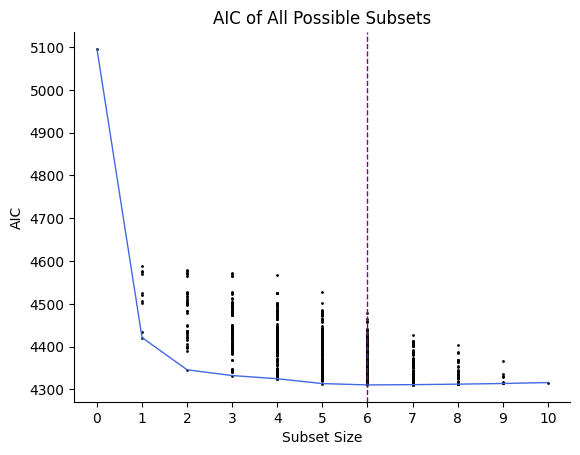

In [155]:

best_per_level = subset_models.groupby(['subset_size']).min('subset_aic').reset_index()
best_subset_size = best_per_level[best_per_level['subset_aic'] == best_per_level['subset_aic'].min()]
best_subset = subset_models[subset_models['subset_aic'] == subset_models['subset_aic'].min()]

plt.scatter(subset_models['subset_size'], subset_models['subset_aic'], s = 1, color = 'black')
plt.plot(best_per_level['subset_size'], best_per_level['subset_aic'], linestyle = '-', linewidth = 1, color = '#4169E1')
plt.axvline(x = best_subset_size.iloc[0,0], color = 'purple', linestyle = '--', linewidth = 1)

plt.gca().spines[['right', 'top']].set_visible(False)
plt.title('AIC of All Possible Subsets')
plt.ylabel('AIC')
plt.xlabel('Subset Size')
plt.xticks(range(11))
plt.show()

In [ ]:
# Modify to include CV component
# include way to select top n models
def forward_stepwise_aic(train, top_n):

    all_cols = np.array(train.columns)
    colnames = all_cols[np.isin(all_cols, np.array(['sex', 'target']), invert = True)]
    print("Current Columns To Iterate Through: ", colnames)
    
    X = np.random.rand(len(train), 1)
    null_model = sm.OLS(train['target'], sm.add_constant(X)).fit()
    
    current_best_aic = null_model.aic
    current_best_subset = np.array([])
    best_model_found = False

    while best_model_found != True:

        current_models_dict = {}
        print('Iterations:')
        for col in colnames:

            temp_subset = np.append(current_best_subset, col)
            print(temp_subset)
            model = sm.OLS(train['target'], sm.add_constant(train[temp_subset])).fit()
            # Perform KFCV (s = T) of AIC here (no need to predict vals for AIC)
            current_models_dict[tuple(temp_subset)] = model.aic

        print('Current Models: ', current_models_dict)
        min_subset = min(current_models_dict, key = current_models_dict.get)
        print('Subset with smallest AIC: ', min_subset)

        if current_models_dict[min_subset] <= current_best_aic:
            print('Prev Best Subset had AIC of: ', current_best_aic)
            current_best_aic = current_models_dict[min_subset]
            print('New Best AIC is:', current_best_aic)
            current_best_subset = np.array(min_subset)
            print('Subset with smallest AIC: ', current_best_subset)
            colnames = all_cols[np.isin(all_cols, np.concatenate((np.array(min_subset), np.array(['sex', 'target']))), invert=True)]
            print('New Cols to Iterate Through: ', colnames)
        else:
            best_model_found = True
            print(current_best_subset)
            print('end')
           

    
forward_stepwise_aic(train, 5)

NameError: name 'train' is not defined

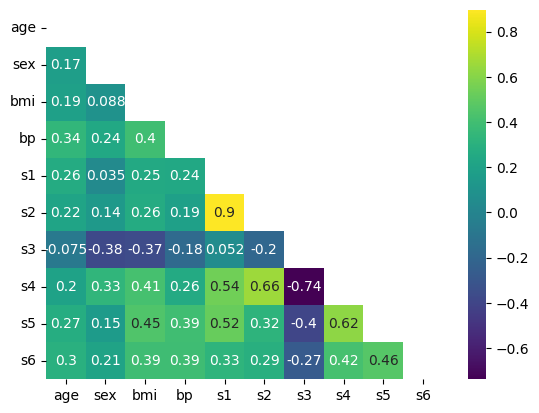

In [35]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
pred_vars = df.columns.drop(['target'])
correlation_matrix = df[pred_vars].corr()
mask = np.triu(np.ones_like(correlation_matrix, dtype=bool))
sns.heatmap(correlation_matrix, annot = True, mask = mask, cmap = 'viridis')
plt.yticks(rotation=0)
plt.show()

In [69]:
# Dealing with Multi-collinearity
    # Step 1: Explain how multi-collinearity fucks up the model.
    # Step 2: Show how to identify multicollinearity: VIF, heatmap
    # Step 3: 


from statsmodels.stats.outliers_influence import variance_inflation_factor
vif_data = pd.DataFrame()
vif_data["Variable"] = df.columns
vif_data["VIF"] = [variance_inflation_factor(exog = df.values, exog_idx = i) for i in range(len(df.columns))]
# print(vif_data)

temp = df[['age', 'sex', 'bmi', 'bp', 's1', 's3', 's5', 's6', 'target']]
new_vif_data = pd.DataFrame()
new_vif_data['Variable'] = temp.columns
new_vif_data["VIF"] = [variance_inflation_factor(exog = temp.values, exog_idx = i) for i in range(len(temp.columns))]
# print(new_vif_data)

abcd = sm.OLS(df['target'], sm.add_constant(df[['sex', 'bmi', 'bp', 's1', 's3', 's5']])).fit()
print(abcd.summary())


                            OLS Regression Results                            
Dep. Variable:                 target   R-squared:                       0.513
Model:                            OLS   Adj. R-squared:                  0.507
Method:                 Least Squares   F-statistic:                     76.44
Date:                Thu, 21 Mar 2024   Prob (F-statistic):           6.31e-65
Time:                        22:16:08   Log-Likelihood:                -2388.1
No. Observations:                 442   AIC:                             4790.
Df Residuals:                     435   BIC:                             4819.
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        152.1335      2.576     59.058      0.0

In [ ]:
# Methods of Determining Outliers
    # Domain Knowledge: Consider the context of your data and consult subject matter experts to determine whether identified outliers are valid data points or errors that need to be addressed.
    # Typical Data Viz/ Outlier methods e.g IQR of Boxplot or Z-scores
    # Cook's Distance and sensitivity analysis with it


# All-Subsets Regression:
# 
# Exhaustively evaluate all possible combinations of predictors and select the subset that optimizes a chosen criterion, such as adjusted R-squared, AIC, BIC, or cross-validated performance metrics.
# This approach provides a comprehensive evaluation of all possible models but can be computationally expensive, especially for large numbers of predictors.
# Regularization Techniques:
# 
# Use regularization methods such as Lasso (L1 regularization) or Ridge (L2 regularization) regression to penalize the coefficients of less important predictors, effectively driving them towards zero.
# These techniques automatically select a subset of predictors by shrinking some coefficients to zero, thereby performing feature selection and improving model interpretability.
# The choice of regularization strength (e.g., the penalty parameter in Lasso regression) can be tuned using cross-validation.
# Forward Selection:
# 
# Start with an empty model and iteratively add predictors that improve model performance the most until no further improvement is observed.
# This approach is computationally efficient and can provide a good subset of predictors, but it may not always find the globally optimal subset.
# Backward Elimination:
# 
# Start with a full model containing all predictors and iteratively remove predictors that contribute the least to the model until further removal degrades model performance.
# This approach is similar to forward selection but may be more computationally expensive, especially for large datasets with many predictors.
# Stepwise Regression:
# 
# Combine forward and backward selection techniques to iteratively add and remove predictors based on statistical significance or model performance criteria.
# Stepwise regression can be forward, backward, or both, and it aims to strike a balance between computational efficiency and model performance.
# Information Criteria:
# 
# Use information criteria such as AIC (Akaike Information Criterion) or BIC (Bayesian Information Criterion) to compare different models based on their goodness of fit and complexity.
# Models with lower AIC or BIC values are preferred, indicating a better trade-off between model fit and complexity.
# Domain Knowledge:
# 
# Incorporate domain knowledge and expert judgment to select predictors that are theoretically relevant or known to have a significant impact on the response variable.
# Domain knowledge can help guide the selection process and improve the interpretability of the final model.

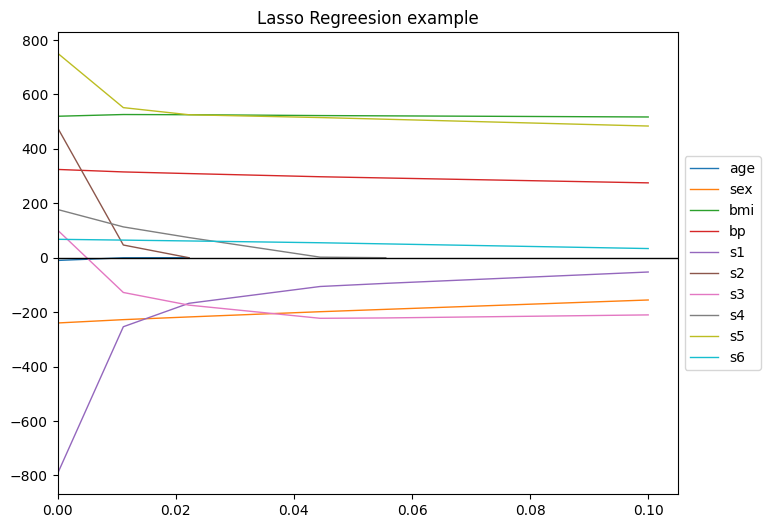

In [38]:
from sklearn.linear_model import Lasso
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

lasso_coefs = pd.DataFrame(columns = df.columns.drop('target'))
alphas = np.linspace(0, 0.1, 10)

for a in alphas:
    lasso = Lasso(alpha = a)  # alpha is the regularization parameter
    lasso.fit(df[df.columns.drop('target')], df['target'])
    lasso_coefs.loc[len(lasso_coefs)] = lasso.coef_

lasso_coefs.index = alphas

fig = plt.figure(figsize = (8, 6))
for col in df.columns.drop('target'):

    first_zero_found = len(lasso_coefs)
    for i in range(len(lasso_coefs)):
        if lasso_coefs.iloc[i][col] == 0:
            first_zero_found = min(first_zero_found, i)

    plt.plot(lasso_coefs.index[0:first_zero_found + 1], lasso_coefs.iloc[0:first_zero_found + 1][col], linewidth = 1, label = col)

plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.axhline(y = 0, color = 'black', linestyle ='-', linewidth = 1)
plt.title('Lasso Regreesion example')
plt.xlim(left = 0)
plt.show()

# Ridge regression for multicollinearity (probably going to be used since we have multicollinearity)
# Lasso regression for sparsity 
    # Understand why this is
# Elastic-Net Regression (probably not going to be used since we don't have sparse data)



In [12]:
# Utilizing Lasso to minimize MSE (roughly alpha = 0.025)
# A more seasoned appraoch is using GridSearchCV, which tunes multiple hyperparameters simultaneously
from sklearn.model_selection import cross_val_score, KFold, LeaveOneOut, GridSearchCV
import numpy as np
from sklearn.linear_model import Lasso
from sklearn.metrics import mean_squared_error

lasso_MSEs = pd.DataFrame(columns = ['alpha', '10-Fold MSE'])
alphas = np.linspace(0, 0.2, 50)

for a in alphas:

    k_fold = KFold(n_splits = 20, shuffle = True)
    MSEs = []

    for train_index, test_index in k_fold.split(df):
        x_train, x_test = df.iloc[train_index][df.columns.drop('target')], df.iloc[test_index][df.columns.drop('target')]
        y_train, y_test = df.iloc[train_index]['target'], df.iloc[test_index]['target']

        lasso = Lasso(alpha = a)
        lasso.fit(x_train, y_train)
        y_pred = lasso.predict(x_test)
        mse = mean_squared_error(y_test, y_pred)
        MSEs.append(mse)
    
    lasso_MSEs.loc[len(lasso_MSEs)] = [a, np.mean(MSEs)]

print(lasso_MSEs)

alphas = np.linspace(0, 0.2, 50)
hyperparams = {'alpha': alphas}
lasso = Lasso()

# Understand why these scores are slightly different
best_lasso_model = GridSearchCV(lasso, hyperparams, cv = 20, scoring = 'neg_mean_squared_error')
best_lasso_model.fit(df[df.columns.drop('target')], df['target'])
print(best_lasso_model.best_params_)
print(-best_lasso_model.best_score_)

       alpha  10-Fold MSE
0   0.000000  3009.585102
1   0.004082  2997.269309
2   0.008163  2995.876145
3   0.012245  2987.808188
4   0.016327  3030.731872
5   0.020408  2990.198576
6   0.024490  3006.805752
7   0.028571  3014.356357
8   0.032653  2977.713901
9   0.036735  2986.336800
10  0.040816  3004.312487
11  0.044898  3015.466764
12  0.048980  2997.772252
13  0.053061  2999.124276
14  0.057143  3000.486270
15  0.061224  3002.657676
16  0.065306  2998.895470
17  0.069388  2991.921392
18  0.073469  3009.622016
19  0.077551  2994.312714
20  0.081633  2995.809389
21  0.085714  3010.636354
22  0.089796  3014.527265
23  0.093878  2995.151097
24  0.097959  3017.108460
25  0.102041  3037.470162
26  0.106122  3009.197382
27  0.110204  3045.855706
28  0.114286  3067.880769
29  0.118367  3009.626346
30  0.122449  3035.335259
31  0.126531  3026.429253
32  0.130612  3046.509406
33  0.134694  3034.938709
34  0.138776  3051.120153
35  0.142857  3050.218594
36  0.146939  3053.141585
37  0.151020

[0.  0.1 0.2 0.3 0.4 0.5 0.6 0.7 0.8 0.9 1.  1.1 1.2 1.3 1.4 1.5 1.6 1.7
 1.8 1.9 2. ]


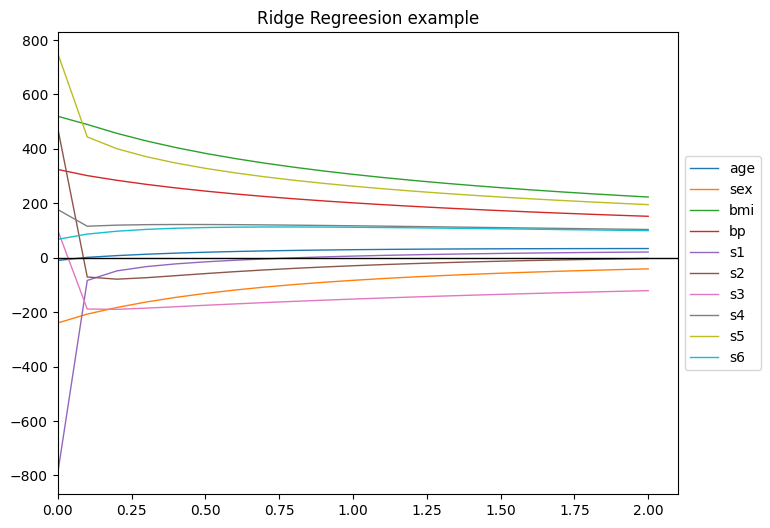

In [22]:
from sklearn.linear_model import Ridge

ridge_coefs = pd.DataFrame(columns = df.columns.drop('target'))
alphas = np.linspace(0, 2, 21)

for a in alphas:
    ridge = Ridge(alpha = a)  # alpha is the regularization parameter
    ridge.fit(df[df.columns.drop('target')], df['target'])
    ridge_coefs.loc[len(ridge_coefs)] = ridge.coef_

ridge_coefs.index = alphas

fig = plt.figure(figsize = (8, 6))
for col in df.columns.drop('target'):

    first_zero_found = len(ridge_coefs)
    for i in range(len(ridge_coefs)):
        if ridge_coefs.iloc[i][col] == 0:
            first_zero_found = min(first_zero_found, i)

    plt.plot(ridge_coefs.index[0:first_zero_found + 1], ridge_coefs.iloc[0:first_zero_found + 1][col], linewidth = 1, label = col)

plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.axhline(y = 0, color = 'black', linestyle ='-', linewidth = 1)
plt.title('Ridge Regreesion example')
plt.xlim(left = 0)
plt.show()

In [ ]:
# Backward stepwise selection:
    # Remove pred with highest p-values or resulting model with least decrease in AIC/BIC? and check model fit. Iterate until model doesn't improve
# Bidirectional stepwise (both forward and backward):
    # Add a predictor via forward criterion.
    # Remove a predictor via backward criterion.

In [ ]:
# General idea of concluding section
# Compare all methods with MSE CV
    # Standard OLS
    # Forward, Backward, Bidirectional
    # Lasso, Ridge, ElasticNet
# Bar Chart of the MSEs
# Say how you want to explore more Linear MOdel shit next like GLMs, or GAMs or some other shit